<a href="https://colab.research.google.com/github/teruto725/recognize_num/blob/master/recognize_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NNを用いて画像認識
実際に作成されたNNを用いて画像認識を行う。  
数字が入った画像を受け取って数字を認識して画像にラベル図付けしたものを返す。  


In [1]:
import google.colab.drive
google.colab.drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

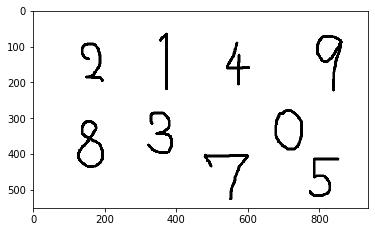

In [3]:
img = cv2.imread('/content/gdrive/My Drive/School Project/System Design Project/learn_OpenCV/num4.png')
plt.imshow(img)

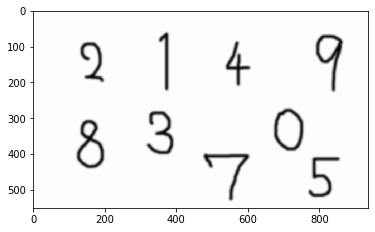

In [4]:
#平滑化
bulr_img =cv2.GaussianBlur(img,(15,15), 0)
plt.imshow(bulr_img)

(551, 936)


array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

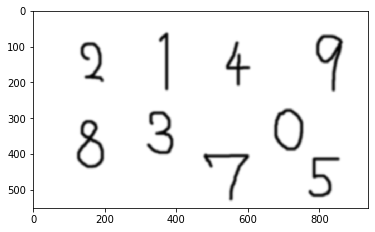

In [5]:
#グレースケール化(輪郭抽出するため)
gray_img = cv2.cvtColor(bulr_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
print(np.shape(gray_img))
plt.gray()
gray_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

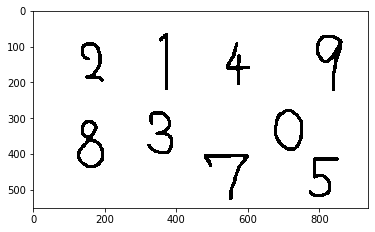

In [6]:
#2値化（輪郭抽出するためだがいらない可能性がある）
threshold_value=150
ret, thresh_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)    
np.shape(thresh_img)
plt.imshow(thresh_img)
thresh_img

In [7]:
#輪郭抽出
fc_img,contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
point_list = list()#座標のリスト
for i in range(0, len(contours)):
    if len(contours[i]) > 0:
        if hierarchy[0][i][3] != 0:#外側のデータだけ使う
            print("con")
            continue
        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 100, 0), 2)
        point_list.append([x,y,w,h])
#plt.imshow(img)

print(point_list)
print(len(point_list))

con
con
con
con
con
[[769, 409, 88, 112], [476, 399, 129, 131], [122, 305, 77, 136], [318, 281, 75, 121], [673, 274, 83, 118], [132, 89, 66, 111], [538, 87, 69, 124], [790, 68, 76, 159], [351, 62, 28, 162]]
9


In [0]:
#表示用関数
def plotimagelist(imglist):
  fig = plt.figure()
  for i in range(len(imglist)):
    ax = fig.add_subplot(len(imglist), 1,i+1)
    ax.imshow(imglist[i])
    ax.set_axis_off()
  plt.show()

In [0]:
#表示用関数
def draw_digit(data):
    size = 28
    plt.figure(figsize=(1, 1))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

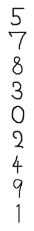

In [10]:
#画像を切り取ってimglistに格納
imglist = list()
for point in point_list:
  #plt.imshow(gray_img[point[0] : point[0]+point[2], point[1]: point[1]+point[3]])
  #plt.gray()
  imglist.append(gray_img[point[1]-10:point[1]+point[3]+10,point[0]-10:point[0]+point[2]+10])#ちょっと大きめにとる
plotimagelist(imglist)

In [11]:
#28*28の画像に圧縮
resize_imglist = list()
for i in range(len(imglist)):
  resize_imglist.append(cv2.resize(imglist[i], (28,28),0,0 ,cv2.INTER_NEAREST))
for i in range(len(imglist)):
  print(np.shape(resize_imglist[i]))


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


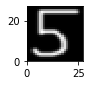

In [12]:
#白黒反転
rev_imglist=list()
for i in range(len(resize_imglist)):
  rev_imglist.append(cv2.bitwise_not(resize_imglist[i]))
draw_digit(rev_imglist[0])

In [13]:
#2次元配列から1次元配列に変換
flat_imglist=list()
for i in range(len(rev_imglist)):
  flat_imglist.append(rev_imglist[i].flatten())
print(np.shape(flat_imglist))

(9, 784)


In [0]:
#学習済みNNを読み込み
from chainer import Sequential
import chainer.functions as F
import chainer.links as L
import chainer
loaded_net = Sequential(L.Linear(784, 1000),F.relu,
                    L.Linear(1000, 1000),F.relu,
                    L.Linear(1000, 10))
chainer.serializers.load_npz('/content/gdrive/My Drive/School Project/System Design Project/learn_OpenCV/num_pic.net', loaded_net)


In [15]:
#データの整形listからndarray にしてfloat32変換
arr = np.array(flat_imglist, dtype=np.float32)
print(arr.dtype)
print(arr)

float32
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


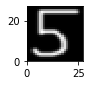

3


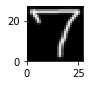

7


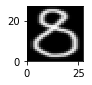

3


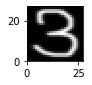

3


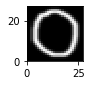

2


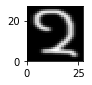

3


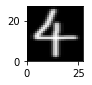

8


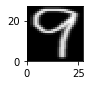

7


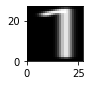

3


In [16]:
#学習
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
  prolist = loaded_net(arr)
for i in range(len(arr)):
  draw_digit(rev_imglist[i])
  print(np.argmax(prolist[i,:].array))

[769, 409, 88, 112]
[476, 399, 129, 131]
[122, 305, 77, 136]
[318, 281, 75, 121]
[673, 274, 83, 118]
[132, 89, 66, 111]
[538, 87, 69, 124]
[790, 68, 76, 159]
[351, 62, 28, 162]


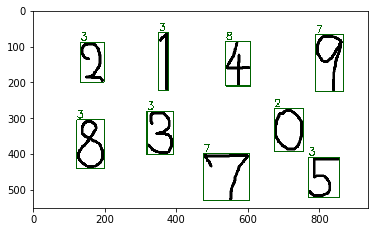

In [17]:
#pointlistを用いて元の画像にラベル付け plotlist = [x,y,w,h]
copy_img = img.copy()
plt.imshow(copy_img)
con = 0
for point in point_list :
  print(point)
  cv2.putText(copy_img, str(np.argmax(prolist[con,:].array)), (point[0], point[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 0), 2, 8)
  cv2.rectangle(copy_img, (point[0], point[1]), (point[0] + point[2], point[1] + point[3]), (0, 100, 0), 2)
  con += 1
plt.imshow(copy_img)


#結果
あまりよくなかった。  
線が細すぎると全然認識できない。